# Training linear regression models using various optimization methods
In this lab exercise, the students will use a set of synthetic data to training a linear regression model. The students will employ four different algorithms/methods to performing the training, namely, **the normal equation method**, **batch gradient descent (BGD)**, **stochastic gradient descent (SGD)**, and **mini-batch gradient descent (MGD)** algorithms. The purpose of this exercise is for students to develop an initutive understanding of how each method works, and to be able to tell the differences between BGD, SGD and MGD in terms of their convergence behavior and their search paths. Students will also adjust the learning rate and make observations of how the learning rate affects the training process.<br>

This exercise contains several tasks to be completed by the students for a total of 100 points. 50 points would come from coding, and the rest comes from writing. There are also 10 bonus poins for those who are intereseted in exploring more about learning rate. <br>

For all the coding tasks, each one can be completed by one line of code. In total, you are expected to finish all the coding tasks with 7 lines of code. <br>
<br>
<font color = red> **One word of advice:**</font> do not consider this as an assignment. Instead, consider this report as something you can refer to in future if you want to refresh your memory of how gradient descent algoirthms work. Also, consider this notebook as something you can show to your colleague or boss to explain what a lineare regession model is, and how various gradient descent algorithms work. <br>
<br>
Last but not the least, <font color=blue >please feel free to use your Python programming and Jupyter Notebook knowledge to make this notebook yours! </font> <br>
<br>
Author: Jiajia Sun, 01/29/2019 at University of Houston.

## Generate the set of data to be used later for training

In [2]:
import numpy as np      # for all the matrix and vector operations (we will always do this for this class.)
import matplotlib.pyplot as plt   # for plotting
plt.rcParams['axes.labelsize'] = 14    # set the label size on each axis
plt.rcParams['xtick.labelsize'] = 12   # set the label size for xtick values
plt.rcParams['ytick.labelsize'] = 12   # set the label size for ytick values

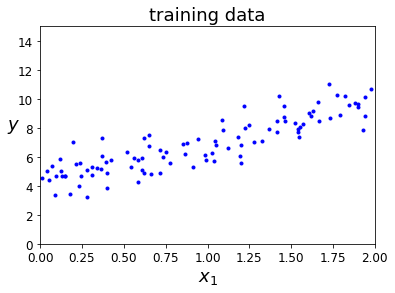

In [3]:
np.random.seed(42)   # set the random seed to make sure that we all generate the same random numbers
x = 2 * np.random.rand(100, 1)    
y = 4 + 3 * x + np.random.randn(100, 1)
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("training data",fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now, let us construct the matrix **X** and vector **y** for later use. <br>
Remember that the matrix **X** and vector **y** are defined as follows: <br>
$\textbf{x} = \begin{bmatrix} 1 & x_1^{(1)}\\ 1 & x_1^{(2)} \\ \cdots \\ 1 & x_1^{(m)} \end{bmatrix}_{m \times 2}$,
$\textbf{y} = \left [\begin{array}{l} y^{(1)} \\ y^{(2)} \\ \cdots \\ y^{(m)} \end{array} \right]_{m \times 1}$, 
where the superscript $(i)$ refers to the $i^{th}$ training example. <br>
Note: To learn more about how to typeset these equations, please refer to this webpage https://en.wikibooks.org/wiki/LaTeX/Mathematics.

In [4]:
# construct the matrix X and the vector y
m = x.shape[0]  # m is the number of training examples
X = np.hstack((np.ones((m,1)),x))  # np.stack simply stacks two vectors (or matrices) horizontally.

Now, let us first implement the normal equation method. 

## Linear regression using normal equation method

<font color = red>**Task 1:** </font> please finish the right hand side of the line of code so that it implements the normal equation method. <font color = red>(10 points) </font>
<br>
<font color=red>**HINT:**</font> Remember that the normal equation is $\hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})^T(\mathbf{X}^T\mathbf{y})$, where $\hat{\mathbf{\theta}}$ represent the optimal values learned from the training data.

In [8]:
theta_best = np.matmul(np.linalg.inv(X.T.dot(X)),np.matmul(X.T,y))

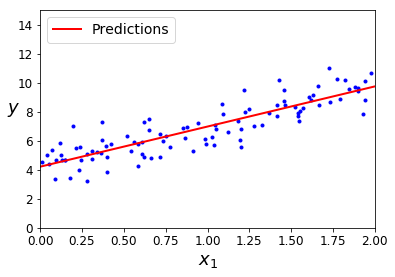

In [9]:
# Now let us plot the learned model on top of our training data (you do not need to do anything. Just run the following code)
xnew = np.linspace(0,2,100).reshape(-1,1)
xnew_b = np.hstack((np.ones((100,1)),xnew))
ypredict = np.matmul(xnew_b,theta_best)
plt.plot(x, y, "b.")
plt.plot(xnew, ypredict, 'r-',linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

<font color = red>**Task 2: ** </font> please write down a few sentences here about the normal equation method. For example,  what is its advantages over gradient descent? What are the problems with normal equation method? Feel free to refer back to the slides that we discussed in class. But please rephrase it using your own language. <font color = red> (15 points) </font>

In [ ]:
(write down your answer to Task 2 below:) 



<font color = red>**A few key points:**</font> <br>
    1\. Normal equation method does not require iterations. It is a closed-form analytical solution. <br>
    2\. However, for large scale ML problems with many number of features, normal equation method becomes very slow, because of the computational cost associated with $(X^T X)^{-1}$. <br>
    3\. For nonlinear problems, normal equation does not exist. <br>
    
<font color = red>Note:</font> As long as their answers include the abover three points, they get all 15 points.  

## Linear regression using batch gradient descent (BGD)
The BGD algorithm can be summarized as follows: <br>
 1\. Given initial model parameter values, $\mathbf{\theta}$ <br>
 2\. <font color = green>for</font> <font color = blue>*iteration*</font> in <font color = red> *range(max_iterations)*</font>: <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  gradient = $\frac{1}{m} * \textbf{X}^{T}(\textbf{X}\theta - \textbf{y})$ <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\mathbf{\theta} = \theta$ - learning_rate*gradient <br>


<font color = red>**Task 3: ** </font> please explain how BGD works using your own language. <font color = red> (5 points) </font>

In [ ]:
(write down your answer to Task 3 below:) 


<font color =red>**Key point:**</font> BGD uses all training examples to calculate the gradient for every step. And it is an iterative process.

In [20]:
learning_rate = 0.1
max_iterations = 1000
np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialize the theta values (i.e., our initial guess for theta)

cost_bgd = []     # cost_bgd is a list that stores the cost function values after each iteration
theta_path_bgd = []  # theta_path_bgd is a list that stores the learned model parameters at each iteration
theta_path_bgd.append(theta)

for iteration in range(max_iterations):
    # Task 4: calculate gradient (10 points)
    gradients = X.T.dot(X.dot(theta)-y)/m
    # Task 5: update the model (10 points)
    theta = theta - learning_rate*gradients
    theta_path_bgd.append(theta)
    cost_bgd.append(np.linalg.norm(np.matmul(X,theta) - y)**2)

Let us plot up the cost function values as a function of iterations.

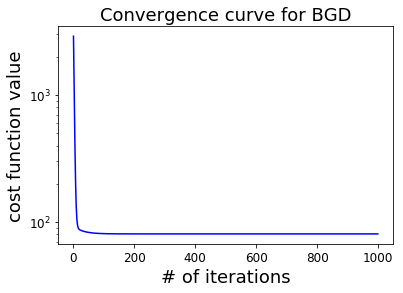

In [21]:
plt.semilogy(np.arange(len(cost_bgd)),cost_bgd,'-b')
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence curve for BGD',fontsize=18)
plt.show()

Your figure should look the same as the following one. If not, go back and check your code.
<img src = "Lab2_ConvergeCurveBGD.png">

Let us take a look at how the learned model parameters evolve.

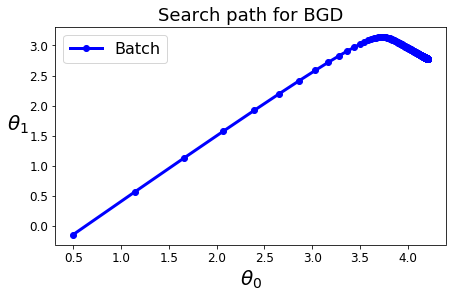

In [22]:
theta_path_bgd = np.array(theta_path_bgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_bgd[:, 0, 0], theta_path_bgd[:, 1, 0], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.title('Search path for BGD', fontsize =18)
#plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Your search path should look the same as the following one. If not, something is wrong with your implementation of BGD.
<img src = "Lab2_SearchPathBGD.png">

<font color=red>**Task 6:** </font> Summarize what you have observed from the above two figures. <font color = red>(5 points)</font>

In [ ]:
(write down your answer to Task 6 below:) 


<font color = red>**Key points:**</font> <br>
1\. The cost function monotonically decreases. <br>
2\. The search path for BGD is regular.

<font color = red>**bonus (10 points):** </font> Change the learning rate to 0.01 and 1.0, plot up the resulting convergence curves, and compare them with the convergence curve when learning rate is 0.1. Please summarize your observations using your own language.

In [ ]:
(write down your answer below:) 


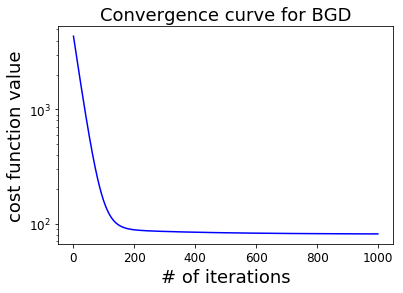

In [5]:
learning_rate = 0.01
max_iterations = 1000
np.random.seed(42)
theta = np.random.randn(2,1)

cost_bgd2 = []     # cost_bgd is a list that stores the cost function values after each iteration
theta_path_bgd2 = []  # theta_path_bgd is a list that stores the learned model parameters at each iteration
theta_path_bgd2.append(theta)

for iteration in range(max_iterations):
    # Task 4: calculate gradient (10 points)
    gradients = X.T.dot(X.dot(theta) - y)/m
    # Task 5: update the model (10 points)
    theta = theta - learning_rate*gradients
    theta_path_bgd2.append(theta)
    cost_bgd2.append(np.linalg.norm(np.matmul(X,theta) - y)**2)
    
plt.semilogy(np.arange(len(cost_bgd2)),cost_bgd2,'-b')
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence curve for BGD',fontsize=18)
plt.show()

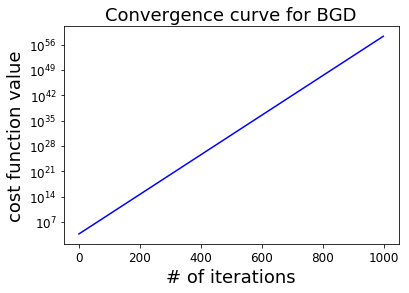

In [6]:
learning_rate = 1.0
max_iterations = 1000
np.random.seed(42)
theta = np.random.randn(2,1)

cost_bgd3 = []     # cost_bgd is a list that stores the cost function values after each iteration
theta_path_bgd3 = []  # theta_path_bgd is a list that stores the learned model parameters at each iteration
theta_path_bgd3.append(theta)

for iteration in range(max_iterations):
    # Task 4: calculate gradient (10 points)
    gradients = X.T.dot(X.dot(theta) - y)/m
    # Task 5: update the model (10 points)
    theta = theta - learning_rate*gradients
    theta_path_bgd3.append(theta)
    cost_bgd3.append(np.linalg.norm(np.matmul(X,theta) - y)**2)
    
plt.semilogy(np.arange(len(cost_bgd3)),cost_bgd3,'-b')
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence curve for BGD',fontsize=18)
plt.show()

<font color=red>**Key points:**</font> <br>
1\. When the learning rate decreases to 0.01 from 0.1, it takes more iterations for the cost function to decrease to the same level as before. <br>
2\. When the learning rat increases to 1.0, the algorithm does not converge at all; it actually diverges because the cost function keeps exploding.

## Linear regresson using stochastic gradient descent (SGD)
The SGD algorithm can be summarized as follows: <br>
 1\. Given initial model parameter values, $\theta$ <br>
 2\. <font color = green>for</font> <font color = blue>*epoch*</font> in <font color = red> *range(n_epochs)*</font>: <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; shuffle the indices [0,1,2,..., m-1] <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color = green>for</font> <font color = blue>*i*</font> in <font color = red> *shuffled indices*</font>: <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  gradient = $\textbf{X}_i^{T}(\textbf{X}_i\theta - \textbf{y}_i)$, where subscript $i$ represents the $i^{th}$ row <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\theta = \theta$ - learning_rate*gradient <br>


<font color = red>**Task 7: ** </font> please explain how SGD works using your own language. <font color = red> (5 points) </font>

In [ ]:
(write down your answer to Task 7 below:) 



<font color = red>**Key points:**</font> <br> SGD only uses one training example to calculate the gradient. Therefore, it is much faster than BGD when it comes to big data with many training examples.

In [25]:
np.random.seed(42)
n_epochs = 50
learning_rate = 0.1   # try decreasing the learning_rate to 0.01 and see what happens
theta = np.random.randn(2,1)

cost_sgd = []
theta_path_sgd = []
theta_path_sgd.append(theta)

for epoch in np.arange(n_epochs):
    sequence = np.arange(m)
    np.random.shuffle(sequence)
    for num in sequence:
        # task 8: obtain the ith row of the matrix X and the ith row of the vector y (10 points)
        xi = X[num:num+1,:] # This is how you can extract the num^th row from the matrix X
        yi = y[num:num+1,:]       
        # task 9: calculate the gradient, and updat the learned model (10 points)
        gradient = xi.T.dot(xi.dot(theta)-yi)
        theta = theta-learning_rate*gradient
        theta_path_sgd.append(theta)
        cost_sgd.append(np.linalg.norm(np.matmul(X,theta) - y)**2)

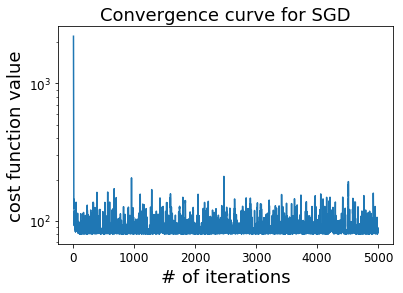

In [26]:
plt.semilogy(np.arange(len(cost_sgd)),cost_sgd)
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence curve for SGD',fontsize=18)
plt.show()

Your figure should look the same as the following one. If not, go back and check your code.
<img src = "Lab2_ConvergeCurveSGD.png">

Let us plot up the search paths of BGD and SGD

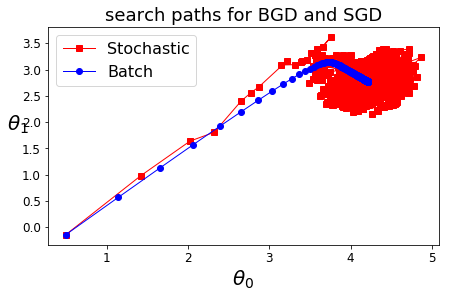

In [27]:
theta_path_sgd = np.array(theta_path_sgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0, 0], theta_path_sgd[:, 1, 0], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_bgd[:, 0, 0], theta_path_bgd[:, 1, 0], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.title("search paths for BGD and SGD",fontsize=18)
#plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Your search path should look the same as the following one. If not, something is wrong with your implementation of SGD.
<img src = "Lab2_SearchPathBGDSGD.png">

<font color = red>**Task 10:** </font> Please compare the convergence curves of BGD and SGD, and write down your observations. Similarly, compare the search paths of BGD and SGD, and report what you have observed. <font color = red> (5 points) </font>

In [ ]:
(write down your answer to Task 10 below:) 



<font color = red>**Key points:**</font><br>
1\. The convergence curve for BGD shows a nice monotonic decrease behavior, whereas the converge curve for SGD quickly decreases to a low level and then keeps fluctuating at that level. <br>
2\. The search path for SGD is very irregular, and it never settles down.

# Linear regression using mini-batch gradient descent
<font color=red>**Task 11:** </font> Please summarize how mini-batch gradient descent algorithm works and how it is different from BGD and SGD. <font color=red>(5 points)</font>

In [ ]:
(write down your answer to Task 11 below:) 



<font color = red>**Key pionts:**</font> <br>
1\. Mini-batch gradient uses a small number of training examples to calculate the gradient and update the model parameters.<br>
2\. BGD uses all training examples, and SGD uses only one training example.     

In [28]:
# The following code implements the mini-batch gradient descent. You just need to run it.
np.random.seed(42)
n_epochs = 50
learning_rate = 0.01   
theta = np.random.randn(2,1)

minibatch_size = 20  
cost_mgd = []
theta_path_mgd = []
theta_path_mgd.append(theta)

for epoch in np.arange(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for num in np.arange(0,m,minibatch_size):
        xi = X_shuffled[num:num+minibatch_size,:]
        yi = y_shuffled[num:num+minibatch_size]
        gradient = xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate*gradient
        theta_path_mgd.append(theta)
        cost_mgd.append(np.linalg.norm(np.matmul(X,theta) - y)**2)

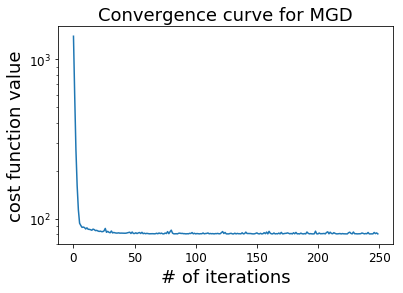

In [29]:
plt.semilogy(np.arange(len(cost_mgd)),cost_mgd)
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence curve for MGD',fontsize=18)
plt.show()

Let us plot up all the three search paths of BGD, SGD and MGD.

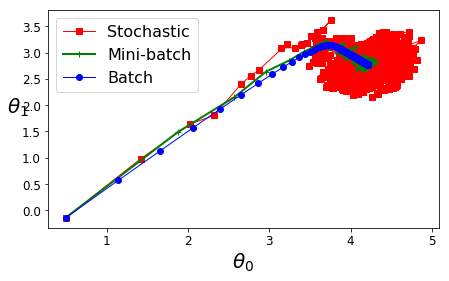

In [30]:
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0, 0], theta_path_sgd[:, 1, 0], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0, 0], theta_path_mgd[:, 1, 0], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0, 0], theta_path_bgd[:, 1, 0], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
#plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

<font color=red>**Task 12:** </font> Compare the convergence curves of BGD, SGD and MGD, and write down what you have observed. Similarly, compare the search paths of all three algorithms, and report your observation in writing. <font color =red> (10 points) </font>

In [ ]:
(write down your answer to Task 12 below:) 


<font color = red>**Key points:**</font><br>
1\. The convergence curve for MGD shows much less fluctuation than SGD. Compared with BGD, the cost function increases from time to time, but much less often than SGD. <br>
2\. The search path for MGD is much more regular than SGD, and less regular than BGD.

## Congratulations! You have now developed a good knowledge of linear regression, the gradient descent and two of its most well-known variants. This will prove to be very useful for you to understand how many machine learing algorithms work, including neural networks.